Logs
- [2024/04/28]   
  You do not need to restart this notebook when updating the scratch library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps

from collections import defaultdict
from typing import List, Tuple, Dict
from collections import Counter
from scratch.natural_language_processing import NaturalLanguageProcessing as nlp

In [2]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
  'font.size': 16,
  'grid.alpha': 0.25})

In [3]:
%load_ext autoreload
%autoreload 2 

Some real world examples of recommendation systems:
- Netflix recomends movies you might want to watch
- Amazon recommends products you might want to buy
- X (Twitter) recommends users you might want to follow

In [4]:
users_interests = [
  ["Hadoop", "Big Data", "HBase", "Java", "Spark", "Storm", "Cassandra"],
  ["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"],
  ["Python", "scikit-learn", "scipy", "numpy", "statsmodels", "pandas"],
  ["R", "Python", "statistics", "regression", "probability"],
  ["machine learning", "regression", "decision trees", "libsvm"],
  ["Python", "R", "Java", "C++", "Haskell", "programming languages"],
  ["statistics", "probability", "mathematics", "theory"],
  ["machine learning", "scikit-learn", "Mahout", "neural networks"],
  ["neural networks", "deep learning", "Big Data", "artificial intelligence"],
  ["Hadoop", "Java", "MapReduce", "Big Data"],
  ["statistics", "R", "statsmodels"],
  ["C++", "deep learning", "artificial intelligence", "probability"],
  ["pandas", "R", "Python"],
  ["databases", "HBase", "Postgres", "MySQL", "MongoDB"],
  ["libsvm", "regression", "support vector machines"]
]

## Manual Curation

Before the digital age, most of the recommendation has been done by the   
knoweldge of curators. For example in library, the librarian who will give    
recommendation which books to be read for a specific topic, or using card catalog

## Recommending What's Popular

In [5]:
popular_interests = Counter(interest for user_interests in users_interests
                            for interest in user_interests)
popular_interests

Counter({'Python': 4,
         'R': 4,
         'Big Data': 3,
         'HBase': 3,
         'Java': 3,
         'statistics': 3,
         'regression': 3,
         'probability': 3,
         'Hadoop': 2,
         'Cassandra': 2,
         'MongoDB': 2,
         'Postgres': 2,
         'scikit-learn': 2,
         'statsmodels': 2,
         'pandas': 2,
         'machine learning': 2,
         'libsvm': 2,
         'C++': 2,
         'neural networks': 2,
         'deep learning': 2,
         'artificial intelligence': 2,
         'Spark': 1,
         'Storm': 1,
         'NoSQL': 1,
         'scipy': 1,
         'numpy': 1,
         'decision trees': 1,
         'Haskell': 1,
         'programming languages': 1,
         'mathematics': 1,
         'theory': 1,
         'Mahout': 1,
         'MapReduce': 1,
         'databases': 1,
         'MySQL': 1,
         'support vector machines': 1})

In [6]:
popular_interests["MySQL"]

1

In [7]:
popular_interests.most_common()

[('Python', 4),
 ('R', 4),
 ('Big Data', 3),
 ('HBase', 3),
 ('Java', 3),
 ('statistics', 3),
 ('regression', 3),
 ('probability', 3),
 ('Hadoop', 2),
 ('Cassandra', 2),
 ('MongoDB', 2),
 ('Postgres', 2),
 ('scikit-learn', 2),
 ('statsmodels', 2),
 ('pandas', 2),
 ('machine learning', 2),
 ('libsvm', 2),
 ('C++', 2),
 ('neural networks', 2),
 ('deep learning', 2),
 ('artificial intelligence', 2),
 ('Spark', 1),
 ('Storm', 1),
 ('NoSQL', 1),
 ('scipy', 1),
 ('numpy', 1),
 ('decision trees', 1),
 ('Haskell', 1),
 ('programming languages', 1),
 ('mathematics', 1),
 ('theory', 1),
 ('Mahout', 1),
 ('MapReduce', 1),
 ('databases', 1),
 ('MySQL', 1),
 ('support vector machines', 1)]

With `popular_interests`, we can just suggest to a user the most popular interests   
that he's not already interested in:

In [8]:
def most_popular_new_interests(user_interests: List[str], 
                                max_results: int = 5) -> List[Tuple[str, int]]:
  suggestions = [(interest, frequency)
                  for interest, frequency in popular_interests.most_common()
                    if interest not in user_interests]
  
  return suggestions[:max_results]

In [9]:
# popular recommendations that are new for user 1 (users_interests[1])
print(users_interests[1])
most_popular_new_interests(users_interests[1])

['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres']


[('Python', 4), ('R', 4), ('Big Data', 3), ('Java', 3), ('statistics', 3)]

In [10]:
# popular recommendations that are new for user 3 (users_interests[3])
print(users_interests[3])
most_popular_new_interests(users_interests[3])

['R', 'Python', 'statistics', 'regression', 'probability']


[('Big Data', 3), ('HBase', 3), ('Java', 3), ('Hadoop', 2), ('Cassandra', 2)]

## User-Based Collaborative Filtering

One way to taking a user's interests into account is to look for users who are   
somehow _similar_ to her, and then suggest the things that those users are    
interested in.

In [11]:
unique_interests = sorted({interest for user_interests in users_interests 
                            for interest in user_interests})

assert unique_interests[:6] == [
  "Big Data", "C++", "Cassandra", "HBase", "Hadoop", "Haskell",
  # ...
] 

In [12]:
print(len(unique_interests))
print(unique_interests)

36
['Big Data', 'C++', 'Cassandra', 'HBase', 'Hadoop', 'Haskell', 'Java', 'Mahout', 'MapReduce', 'MongoDB', 'MySQL', 'NoSQL', 'Postgres', 'Python', 'R', 'Spark', 'Storm', 'artificial intelligence', 'databases', 'decision trees', 'deep learning', 'libsvm', 'machine learning', 'mathematics', 'neural networks', 'numpy', 'pandas', 'probability', 'programming languages', 'regression', 'scikit-learn', 'scipy', 'statistics', 'statsmodels', 'support vector machines', 'theory']


Next we want to produce an "interest" vector of 0s and 1s for each user.

In [13]:
def make_user_interest_vector(user_interests: List[str]) -> List[int]:
  """Given a list of interests, produce a vector whose ith element is 1 
  if unique_interests[i] is in the list, 0 otherwise"""
  return [1 if interest in user_interests else 0 
          for interest in unique_interests]

Transform each `user_interests` into a vector where the length is equal to  
`unique_interests`. 

In [14]:
user_interest_vectors = [make_user_interest_vector(user_interests)
                          for user_interests in users_interests]

# user_interest_vector[i][j] equals 1 if user i specified interest j, and 0 otherwise
print(user_interest_vectors[0])

[1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [15]:
for user in user_interest_vectors:
  print(user)

[1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 1, 0, 

In [19]:
for user in user_interest_vectors:
  print(np.array(np.where(user)[0]) + 1)

[ 1  3  4  5  7 16 17]
[ 3  4 10 12 13]
[14 26 27 31 32 34]
[14 15 28 30 33]
[20 22 23 30]
[ 2  6  7 14 15 29]
[24 28 33 36]
[ 8 23 25 31]
[ 1 18 21 25]
[1 5 7 9]
[15 33 34]
[ 2 18 21 28]
[14 15 27]
[ 4 10 11 13 19]
[22 30 35]


Similarity between two `user_interests`'s are calculated using `cosine_similarity`    

In [67]:
user_similarities = [[nlp.cosine_similarity(interest_vector_i, interest_vector_j)
                      for interest_vector_j in user_interest_vectors]
                        for interest_vector_i in user_interest_vectors]

In [68]:
for user_similarity in user_similarities:
  print([f"{col:.3f}" for col in user_similarity])

['1.000', '0.338', '0.000', '0.000', '0.000', '0.154', '0.000', '0.000', '0.189', '0.567', '0.000', '0.000', '0.000', '0.169', '0.000']
['0.338', '1.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.600', '0.000']
['0.000', '0.000', '1.000', '0.183', '0.000', '0.167', '0.000', '0.204', '0.000', '0.000', '0.236', '0.000', '0.471', '0.000', '0.000']
['0.000', '0.000', '0.183', '1.000', '0.224', '0.365', '0.447', '0.000', '0.000', '0.000', '0.516', '0.224', '0.516', '0.000', '0.258']
['0.000', '0.000', '0.000', '0.224', '1.000', '0.000', '0.000', '0.250', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.577']
['0.154', '0.000', '0.167', '0.365', '0.000', '1.000', '0.000', '0.000', '0.000', '0.204', '0.236', '0.204', '0.471', '0.000', '0.000']
['0.000', '0.000', '0.000', '0.447', '0.000', '0.000', '1.000', '0.000', '0.000', '0.000', '0.289', '0.250', '0.000', '0.000', '0.000']
['0.000', '0.000', '0.204', '0.000', '0.250', '0

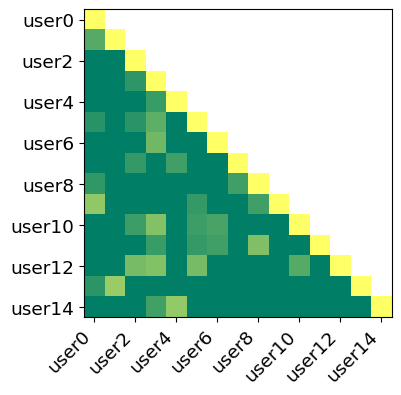

In [69]:
A = np.array(user_similarities)
mask = np.tri(A.shape[0], k=-1).T
A = np.ma.array(A, mask=mask) # mask out the lower triangle

fig, ax = plt.subplots(figsize=(4, 4))
cmap = colormaps.get_cmap('summer') # jet doesn't have white color
cmap.set_bad('w') # default value is 'k'
ax.imshow(A, interpolation="nearest", cmap=cmap, vmin=0, vmax=1)

ax.set_yticks(np.arange(0, len(A), 2))
ax.set_yticklabels([f"user{d}" for d in range(0, len(A), 2)], fontsize="small")

ax.set_xticks(np.arange(0, len(A), 2))
ax.set_xticklabels([f"user{d}" for d in range(0, len(A), 2)],
                    rotation=45, ha="right", fontsize="small")
plt.show(fig)

In [70]:
# Users 0 and 9 share interests in Hadoop, Java, and Big Data
assert 0.56 < user_similarities[0][9] < 0.58, "several shared interests"

# Users 0 and 9 share only one interest: Big Data
assert 0.18 < user_similarities[0][8] < 0.20, "only one shared interest"

Using `user_similarities`, we can write a function that finds the most similar  
users to a given user. We'll make sure not to include the user herself, nor any  
users with zero similarity

In [71]:
def most_similar_users_to(user_id: int) -> List[Tuple[int, float]]:
  pairs = [(other_user_id, similarity)                        # Find other
            for other_user_id, similarity in                  # users with
              enumerate(user_similarities[user_id])           # nonzero
            if user_id != other_user_id and similarity > 0]   # similarity.
  
  return sorted(pairs,                      # Sort them
                key=lambda pair: pair[-1],  # most similar
                reverse=True)               # first.

In [72]:
most_similar_users_to(0)

[(9, 0.5669467095138409),
 (1, 0.3380617018914066),
 (8, 0.1889822365046136),
 (13, 0.1690308509457033),
 (5, 0.1543033499620919)]

To get new recommendations, we put the similarity score of the other users   
to their interests. Then, we sum all similarity for the same interests   
from the other users.

<img src="./img-resources/recommender-sys-user-based-suggestion.png" width=800>

In [73]:
def user_based_suggestion(user_id: int, include_current_interests: bool = False):
  # Sum up the similarities
  suggestions: Dict[str, float] = defaultdict(float)
  for other_user_id, similarity in most_similar_users_to(user_id):
    for interest in users_interests[other_user_id]:
      suggestions[interest] += similarity
  
  # Convert them to a sorted list
  suggestions = sorted(suggestions.items(),
                        key=lambda pair: pair[-1],    # weight
                        reverse=True)

  # And (maybe) exclude already interests
  if include_current_interests:
    return suggestions
  else:
    return [(suggestion, weight)
            for suggestion, weight in suggestions
              if suggestions not in users_interests[user_id]]

In [74]:
user_based_suggestion(0)

[('Big Data', 0.7559289460184544),
 ('Java', 0.7212500594759328),
 ('Hadoop', 0.5669467095138409),
 ('MapReduce', 0.5669467095138409),
 ('MongoDB', 0.50709255283711),
 ('HBase', 0.50709255283711),
 ('Postgres', 0.50709255283711),
 ('NoSQL', 0.3380617018914066),
 ('Cassandra', 0.3380617018914066),
 ('neural networks', 0.1889822365046136),
 ('deep learning', 0.1889822365046136),
 ('artificial intelligence', 0.1889822365046136),
 ('databases', 0.1690308509457033),
 ('MySQL', 0.1690308509457033),
 ('Python', 0.1543033499620919),
 ('R', 0.1543033499620919),
 ('C++', 0.1543033499620919),
 ('Haskell', 0.1543033499620919),
 ('programming languages', 0.1543033499620919)]

There is a problem to the above approach if the number of items (unique interests)   
are very large (remember the curse of dimensionality).  
All our vectors in high dimensional spaces are very far apart.

## Item-Based Collaborative Filtering

In [75]:
unique_interests

['Big Data',
 'C++',
 'Cassandra',
 'HBase',
 'Hadoop',
 'Haskell',
 'Java',
 'Mahout',
 'MapReduce',
 'MongoDB',
 'MySQL',
 'NoSQL',
 'Postgres',
 'Python',
 'R',
 'Spark',
 'Storm',
 'artificial intelligence',
 'databases',
 'decision trees',
 'deep learning',
 'libsvm',
 'machine learning',
 'mathematics',
 'neural networks',
 'numpy',
 'pandas',
 'probability',
 'programming languages',
 'regression',
 'scikit-learn',
 'scipy',
 'statistics',
 'statsmodels',
 'support vector machines',
 'theory']

In [76]:
interest_user_matrix = [[user_interest_vector[j]
                          for user_interest_vector in user_interest_vectors]
                            for j, _ in enumerate(unique_interests)]

interest_user_matrix

[[1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

`interest_user_matrix` in term of user's index and create a dictionary
where the keys are `unique_interests`

In [77]:
interest_user_dict = {}
for interest, item in zip(unique_interests, interest_user_matrix):
  interest_user_dict[interest] = np.arange(len(interest_user_matrix[0]), dtype=int)[np.array(item, dtype=bool)]

interest_user_dict

{'Big Data': array([0, 8, 9]),
 'C++': array([ 5, 11]),
 'Cassandra': array([0, 1]),
 'HBase': array([ 0,  1, 13]),
 'Hadoop': array([0, 9]),
 'Haskell': array([5]),
 'Java': array([0, 5, 9]),
 'Mahout': array([7]),
 'MapReduce': array([9]),
 'MongoDB': array([ 1, 13]),
 'MySQL': array([13]),
 'NoSQL': array([1]),
 'Postgres': array([ 1, 13]),
 'Python': array([ 2,  3,  5, 12]),
 'R': array([ 3,  5, 10, 12]),
 'Spark': array([0]),
 'Storm': array([0]),
 'artificial intelligence': array([ 8, 11]),
 'databases': array([13]),
 'decision trees': array([4]),
 'deep learning': array([ 8, 11]),
 'libsvm': array([ 4, 14]),
 'machine learning': array([4, 7]),
 'mathematics': array([6]),
 'neural networks': array([7, 8]),
 'numpy': array([2]),
 'pandas': array([ 2, 12]),
 'probability': array([ 3,  6, 11]),
 'programming languages': array([5]),
 'regression': array([ 3,  4, 14]),
 'scikit-learn': array([2, 7]),
 'scipy': array([2]),
 'statistics': array([ 3,  6, 10]),
 'statsmodels': array([ 2, 

In the above result, row `j` of `interest_user_matrix` is column `j` of   
`user_interest_vectors`.

In [78]:
interest_user_matrix[0]

[1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]

The above result shows that user 0, 8, and 9 indicates that they have interest  
in Big Data (Big Data is `unique_interests[0]`)

Now we use again cosine similarity. We compare similarity between two rows in   
`interest_user_matrix`

In [79]:
interest_similarities = [[nlp.cosine_similarity(user_vector_i, user_vector_j)
                            for user_vector_j in interest_user_matrix]
                          for user_vector_i in interest_user_matrix]

for interest_similarity in interest_similarities:
  print([f"{interest:.3f}" for interest in interest_similarity])

['1.000', '0.000', '0.408', '0.333', '0.816', '0.000', '0.667', '0.000', '0.577', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.577', '0.577', '0.408', '0.000', '0.000', '0.408', '0.000', '0.000', '0.000', '0.408', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000']
['0.000', '1.000', '0.000', '0.000', '0.000', '0.707', '0.408', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.354', '0.354', '0.000', '0.000', '0.500', '0.000', '0.000', '0.500', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.408', '0.707', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000']
['0.408', '0.000', '1.000', '0.816', '0.500', '0.000', '0.408', '0.000', '0.000', '0.500', '0.000', '0.707', '0.500', '0.000', '0.000', '0.707', '0.707', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000']
['0.333', '0.000', '0.816

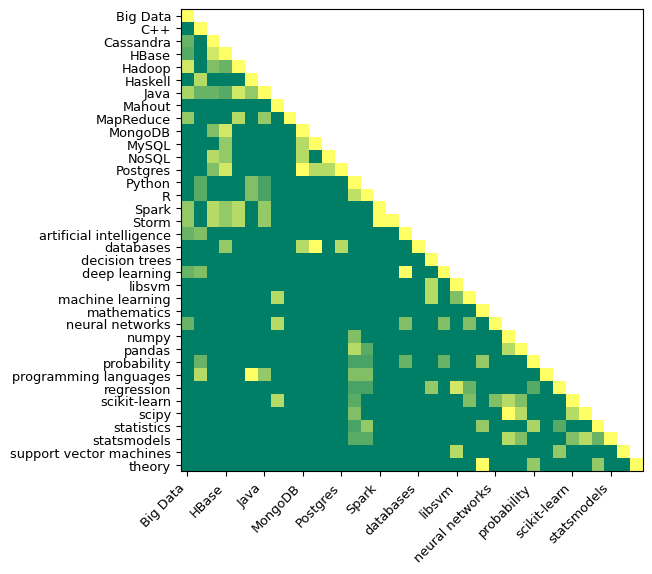

In [80]:
A = np.array(interest_similarities)
mask = np.tri(A.shape[0], k=-1).T
A = np.ma.array(A, mask=mask) # mask out the lower triangle
fig, ax = plt.subplots(figsize=(6, 6))
cmap = colormaps.get_cmap('summer') # jet doesn't have white color
cmap.set_bad('w') # default value is 'k'
ax.imshow(A, interpolation="nearest", cmap=cmap, vmin=0, vmax=1)

ax.set_yticks(np.arange(0, len(A), 1))
ax.set_yticklabels([interest for interest in unique_interests[::]], fontsize="xx-small")

ax.set_xticks(np.arange(0, len(A), 3))
ax.set_xticklabels([interest for interest in unique_interests[::3]], 
                    rotation=45, ha="right", fontsize="xx-small")
plt.show()


Find all interests that has non zero similarity with interest0 ("Big Data")

In [81]:
np.array(unique_interests)[np.argwhere(np.array(interest_similarities)[:, 0] > 1e-5)]

array([['Big Data'],
       ['Cassandra'],
       ['HBase'],
       ['Hadoop'],
       ['Java'],
       ['MapReduce'],
       ['Spark'],
       ['Storm'],
       ['artificial intelligence'],
       ['deep learning'],
       ['neural networks']], dtype='<U23')

In [82]:
np.array(unique_interests[1:])[np.argmax(np.array(interest_similarities)[1:, 0])]

'Hadoop'

We can find the interests most similar to Big Data (`unique_interests[0]`) with  
the following function

In [83]:
def most_similar_interests_to(interest_id: int):
  similarities = interest_similarities[interest_id]
  pairs = [(unique_interests[other_interest_id], similarity)
            for other_interest_id, similarity in enumerate(similarities)
              if interest_id != other_interest_id and similarity > 0]
  return sorted(pairs,
                key=lambda pair: pair[-1],
                reverse=True)

In [92]:
sorted(most_similar_interests_to(2), key=lambda x: x[0])

[('Big Data', 0.4082482904638631),
 ('HBase', 0.8164965809277261),
 ('Hadoop', 0.5),
 ('Java', 0.4082482904638631),
 ('MongoDB', 0.5),
 ('NoSQL', 0.7071067811865475),
 ('Postgres', 0.5),
 ('Spark', 0.7071067811865475),
 ('Storm', 0.7071067811865475)]

In [54]:
unique_interests[16]

'Storm'

In [25]:
most_similar_interests_to(16)

[('Spark', 1.0),
 ('Cassandra', 0.7071067811865475),
 ('Hadoop', 0.7071067811865475),
 ('Big Data', 0.5773502691896258),
 ('HBase', 0.5773502691896258),
 ('Java', 0.5773502691896258)]

Now we can ceate recommendations for a user by summing up the similarities of  
the interests similar to his:

In [26]:
def item_based_suggestions(user_id: int,
                            include_current_interests: bool = False):
  # Add up the similar interests
  suggestions = defaultdict(float)
  user_interest_vector = user_interest_vectors[user_id]
  for interest_id, is_interested in enumerate(user_interest_vector):
    if is_interested == 1:
      similar_interests = most_similar_interests_to(interest_id)
      for interest, similarity in similar_interests:
        suggestions[interest] += similarity

  # Sort them by weight
  suggestions = sorted(suggestions.items(),
                        key=lambda pair: pair[-1],
                        reverse=True)
  
  if include_current_interests:
    return suggestions
  else:
    return [(suggestion, weight)
            for suggestion, weight in suggestions
              if suggestion not in users_interests[user_id]]

In [27]:
item_based_suggestions(0)

[('MapReduce', 1.861807319565799),
 ('MongoDB', 1.3164965809277263),
 ('Postgres', 1.3164965809277263),
 ('NoSQL', 1.2844570503761732),
 ('MySQL', 0.5773502691896258),
 ('databases', 0.5773502691896258),
 ('Haskell', 0.5773502691896258),
 ('programming languages', 0.5773502691896258),
 ('artificial intelligence', 0.4082482904638631),
 ('deep learning', 0.4082482904638631),
 ('neural networks', 0.4082482904638631),
 ('C++', 0.4082482904638631),
 ('Python', 0.2886751345948129),
 ('R', 0.2886751345948129)]